In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam

import tensorflow as tf
import numpy as np

import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.5
1.2.0


### Lets import our dataset

In [3]:
reviews = pd.read_csv('./imdb_data/reviews.txt', header=None)
labels = pd.read_csv('./imdb_data/labels_ohe.csv', header=None)

In [4]:
len(reviews)

25000

In [5]:
reviews.head()

,0
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


In [7]:
reviews[0]

0        bromwell high is a cartoon comedy . it ran at ...
1        story of a man who has unnatural feelings for ...
2        homelessness  or houselessness as george carli...
3        airport    starts as a brand new luxury    pla...
4        brilliant over  acting by lesley ann warren . ...
5        this film lacked something i couldn  t put my ...
6        this is easily the most underrated film inn th...
7        sorry everyone    i know this is supposed to b...
8        this is not the typical mel brooks film . it w...
9        when i was little my parents took me along to ...
10       this isn  t the comedic robin williams  nor is...
11         it appears that many critics find the idea o...
12       yes its an art . . . to successfully make a sl...
13       the second attempt by a new york intellectual ...
14       in this  critically acclaimed psychological th...
15       i don  t know who to blame  the timid writers ...
16       the night listener           robin williams  t.

In [8]:

labels[:5]
# 0 = bad 1 = good

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


Counting the words in the dataset

In [9]:
total_counts = Counter()
for i,row in reviews.iterrows():
    print(i)
    print(row)
    total_counts.update(row[0].split(' '))

print("Total words in data set: ", len(total_counts))

0
0    bromwell high is a cartoon comedy . it ran at ...
Name: 0, dtype: object
1
0    story of a man who has unnatural feelings for ...
Name: 1, dtype: object
2
0    homelessness  or houselessness as george carli...
Name: 2, dtype: object
3
0    airport    starts as a brand new luxury    pla...
Name: 3, dtype: object
4
0    brilliant over  acting by lesley ann warren . ...
Name: 4, dtype: object
5
0    this film lacked something i couldn  t put my ...
Name: 5, dtype: object
6
0    this is easily the most underrated film inn th...
Name: 6, dtype: object
7
0    sorry everyone    i know this is supposed to b...
Name: 7, dtype: object
8
0    this is not the typical mel brooks film . it w...
Name: 8, dtype: object
9
0    when i was little my parents took me along to ...
Name: 9, dtype: object
10
0    this isn  t the comedic robin williams  nor is...
Name: 10, dtype: object
11
0      it appears that many critics find the idea o...
Name: 11, dtype: object
12
0    yes its an art . . . to succ

276
0    shinjuku triad society  albeit from perfect  i...
Name: 276, dtype: object
277
0    there is no suspense in this serial  when one ...
Name: 277, dtype: object
278
0    this movie is the first of miikes triad societ...
Name: 278, dtype: object
279
0     . . . this would have been what you got .  br...
Name: 279, dtype: object
280
0    a lot has been said about shinjuku triad socie...
Name: 280, dtype: object
281
0    granting the budget and time constraints of se...
Name: 281, dtype: object
282
0    this was the beginning of it all  granted  thi...
Name: 282, dtype: object
283
0    this show made me feel physically sick  and to...
Name: 283, dtype: object
284
0    here it is . . the first ever episode of frien...
Name: 284, dtype: object
285
0    he was my hero for all time until he went alon...
Name: 285, dtype: object
286
0    and that  s how the greatest comedy of tv star...
Name: 286, dtype: object
287
0    i can barely find the words to express how utt...
Name: 287, dtype:

Name: 794, dtype: object
795
0    i have read the whole  a wrinkle in time  book...
Name: 795, dtype: object
796
0    meryl streep is such a genius . well  at least...
Name: 796, dtype: object
797
0    the  wrinkle in time  book series is my favori...
Name: 797, dtype: object
798
0    this movie was nominated for best picture but ...
Name: 798, dtype: object
799
0    horrible acting  horrible cast and cheap props...
Name: 799, dtype: object
800
0    this is a docudrama story on the lindy chamber...
Name: 800, dtype: object
801
0    i got all excited when i saw the ads for this ...
Name: 801, dtype: object
802
0    once you pick your jaw up from off the floor f...
Name: 802, dtype: object
803
0    this abc straight  to  tv failure does absolut...
Name: 803, dtype: object
804
0    meryl streep is excellent in her nuanced and s...
Name: 804, dtype: object
805
0    disney  what happened  i really wish the movie...
Name: 805, dtype: object
806
0    spoilers following i picked up the book  e

1288
0    this fabulous movie must be viewed knowing tha...
Name: 1288, dtype: object
1289
0    i saw this last week after picking up the dvd ...
Name: 1289, dtype: object
1290
0    an opium den  a dirty little boy  actually a m...
Name: 1290, dtype: object
1291
0    there was not one original idea in this story ...
Name: 1291, dtype: object
1292
0    it has singing . it has drama . it has comedy ...
Name: 1292, dtype: object
1293
0    at first i was convinced that this was a made ...
Name: 1293, dtype: object
1294
0    the stock market crash of     and the depressi...
Name: 1294, dtype: object
1295
0    i  m sorry to say this  but the acting in this...
Name: 1295, dtype: object
1296
0      footlight parade  is fascinating on so many ...
Name: 1296, dtype: object
1297
0    the only redeeming quality of this movie is th...
Name: 1297, dtype: object
1298
0    footlight parade is among the best of the     ...
Name: 1298, dtype: object
1299
0    early  heavy  war  time propaganda short urg

1794
0    i enjoyed every moment of this movie  even tho...
Name: 1794, dtype: object
1795
0    i was given the book version of kazaam for my ...
Name: 1795, dtype: object
1796
0    russell  my fav  is gorgeous in this film . bu...
Name: 1796, dtype: object
1797
0    this is the worst film i have ever seen . i wa...
Name: 1797, dtype: object
1798
0    movie  comedies  nowadays are generally    min...
Name: 1798, dtype: object
1799
0    how a director of altman  s experience could e...
Name: 1799, dtype: object
1800
0    very nicely done movie . it does stay in your ...
Name: 1800, dtype: object
1801
0    there  s only one thing i need to say about th...
Name: 1801, dtype: object
1802
0    this film takes you to another time when there...
Name: 1802, dtype: object
1803
0    this is one of the most god  awful movies ever...
Name: 1803, dtype: object
1804
0    japanese tomo akiyama  s keko mask       is ex...
Name: 1804, dtype: object
1805
0    what a pathetic movie .  br    br   i won  t

0    wracked with guilt after a lot of things felt ...
Name: 2294, dtype: object
2295
0      i love new york  is another entry by vh    m...
Name: 2295, dtype: object
2296
0    i don  t think i  ll ever understand the hate ...
Name: 2296, dtype: object
2297
0    the latest rumor going around is that vh  is s...
Name: 2297, dtype: object
2298
0    eric valette is obviously a talented film  mak...
Name: 2298, dtype: object
2299
0    i think that new york is a big fake  i mean he...
Name: 2299, dtype: object
2300
0    four prisoners share a single cell the dominee...
Name: 2300, dtype: object
2301
0    this is the most saccharine romance i ever sat...
Name: 2301, dtype: object
2302
0    a prison cell . four prisoners  carrere  a you...
Name: 2302, dtype: object
2303
0    it must be the most corniest tv show on the ai...
Name: 2303, dtype: object
2304
0    now  i know french inmates are unlikely to hav...
Name: 2304, dtype: object
2305
0    i love the episode where jim becomes the green...

Name: 2796, dtype: object
2797
0    i gave  to this film . i can  t understand how...
Name: 2797, dtype: object
2798
0    michael cacoyannis has had a relatively long c...
Name: 2798, dtype: object
2799
0    i went to school with jeremy earl  that is how...
Name: 2799, dtype: object
2800
0    well the story is a little hard to follow the ...
Name: 2800, dtype: object
2801
0    this movie should be called  plan  from joseph...
Name: 2801, dtype: object
2802
0    this masterpiece of lesbian horror comes from ...
Name: 2802, dtype: object
2803
0    to start with  i have to point out the fact th...
Name: 2803, dtype: object
2804
0    the devil  s plaything is my second attempt at...
Name: 2804, dtype: object
2805
0    adrian has just gone out of the asylum  being ...
Name: 2805, dtype: object
2806
0    this is an excellent show  i had a us history ...
Name: 2806, dtype: object
2807
0    for shame  for shame that a fine actor such as...
Name: 2807, dtype: object
2808
0    this was one of th

3303
0    the best laurel and hardy shorts are filled to...
Name: 3303, dtype: object
3304
0    i rented zero day from the local video store l...
Name: 3304, dtype: object
3305
0    it  s hard to imagine that anyone could find t...
Name: 3305, dtype: object
3306
0    if you  re looking for a hollywood action pack...
Name: 3306, dtype: object
3307
0    in the u . s .  very few films have been made ...
Name: 3307, dtype: object
3308
0    this is one of those movies  like dave  americ...
Name: 3308, dtype: object
3309
0    pedantic  overlong fabrication which attempts ...
Name: 3309, dtype: object
3310
0    i watched this film many years ago and have se...
Name: 3310, dtype: object
3311
0    i have to agree with most everyone  s opinion ...
Name: 3311, dtype: object
3312
0    the unborn is a very  very different film . ja...
Name: 3312, dtype: object
3313
0    this is a fascinating film   especially to old...
Name: 3313, dtype: object
3314
0    the unborn tells the tale of a married coupl

3789
0    this stuffy melodrama is quite easily the wors...
Name: 3789, dtype: object
3790
0    to all the reviewers on this page  i would hav...
Name: 3790, dtype: object
3791
0    a novel by remarque . a cast that looks great ...
Name: 3791, dtype: object
3792
0    i remember seeing this movie a long time ago  ...
Name: 3792, dtype: object
3793
0    this     made for tv movie was shown on a wome...
Name: 3793, dtype: object
3794
0    the reason why people say that this movie scar...
Name: 3794, dtype: object
3795
0    blows my mind how this movie got made . i watc...
Name: 3795, dtype: object
3796
0    now  for all of the cinematographical buffs ou...
Name: 3796, dtype: object
3797
0    you  ve heard it said to live every moment as ...
Name: 3797, dtype: object
3798
0    night of the living homeless is a funny spoof ...
Name: 3798, dtype: object
3799
0    as a fan of eric rohmer  s studies of the cont...
Name: 3799, dtype: object
3800
0    long before tim lahaye and jerry b . jenkins

0    i think this is a lovely family movie . there ...
Name: 4294, dtype: object
4295
0    my kid makes better videos than this  i feel r...
Name: 4295, dtype: object
4296
0    at first you think another disney movie  it mi...
Name: 4296, dtype: object
4297
0    i sat through almost one episode of this serie...
Name: 4297, dtype: object
4298
0    although i don  t usually go for relentlessly ...
Name: 4298, dtype: object
4299
0    billy chung siu hung  s  the bloody swordplay ...
Name: 4299, dtype: object
4300
0    i really enjoyed this movie as a young kid . a...
Name: 4300, dtype: object
4301
0    this movie is really wack . there is really no...
Name: 4301, dtype: object
4302
0    that was definitely the case with angels in th...
Name: 4302, dtype: object
4303
0    superhero movies pretty much always suck  and ...
Name: 4303, dtype: object
4304
0    i enjoy movies like this for their spirit  no ...
Name: 4304, dtype: object
4305
0    the movie began well enough . it had a fellow ...

Name: 4796, dtype: object
4797
0    i can  t believe i actually watched this but i...
Name: 4797, dtype: object
4798
0    this is my favorite of the three care bears mo...
Name: 4798, dtype: object
4799
0    i don  t often give one star reviews  but the ...
Name: 4799, dtype: object
4800
0    a vastly underrated black comedy  the finest i...
Name: 4800, dtype: object
4801
0    i happened upon this flick on a rainy sunday  ...
Name: 4801, dtype: object
4802
0    from the writer of  what ever happened to baby...
Name: 4802, dtype: object
4803
0      the deadly look of love  is essentially  fat...
Name: 4803, dtype: object
4804
0    the most bizarre of the cinematic sub  genres ...
Name: 4804, dtype: object
4805
0    this is not horror  as the first part was this...
Name: 4805, dtype: object
4806
0    i found the film quite expressive  the way the...
Name: 4806, dtype: object
4807
0    absolutely putrid slasher film has not one red...
Name: 4807, dtype: object
4808
0    in a year of prete

0    there aren  t many good things to say at all a...
Name: 5323, dtype: object
5324
0    the first time you see the second renaissance ...
Name: 5324, dtype: object
5325
0    i read somewhere where this film was supposed ...
Name: 5325, dtype: object
5326
0    what was always missing with the matrix story ...
Name: 5326, dtype: object
5327
0    look  it  s the third one  so you already know...
Name: 5327, dtype: object
5328
0    this is the first of a two part back  story to...
Name: 5328, dtype: object
5329
0    the supernatural  vengeful police officer is b...
Name: 5329, dtype: object
5330
0    i think the movie was pretty good  will add it...
Name: 5330, dtype: object
5331
0    being a big fan of the  other  planet of the a...
Name: 5331, dtype: object
5332
0    that was the first thing that sprang to mind a...
Name: 5332, dtype: object
5333
0    oh  brother . . . after hearing about this rid...
Name: 5333, dtype: object
5334
0    this is the second animatrix short  and the fi...

Name: 5796, dtype: object
5797
0    a good cast is appallingly wasted in this slow...
Name: 5797, dtype: object
5798
0    it was an excellent piece to the puppet series...
Name: 5798, dtype: object
5799
0    here was no effort put into valentine to preve...
Name: 5799, dtype: object
5800
0    this is one of may all  time favourite films ....
Name: 5800, dtype: object
5801
0    a reasonable effort is summary for this film ....
Name: 5801, dtype: object
5802
0    this movie is brilliant . the comments made be...
Name: 5802, dtype: object
5803
0    i was excited to discover this late sixties co...
Name: 5803, dtype: object
5804
0    myself and my groovadelic    something pals ju...
Name: 5804, dtype: object
5805
0    maggie smith and peter ustinov as a very unlik...
Name: 5805, dtype: object
5806
0    a great    s flick  parker posey is fabulous i...
Name: 5806, dtype: object
5807
0    this movie starts slow  then tapers off . afte...
Name: 5807, dtype: object
5808
0    i remember parker 

6316
0    the show is about two sisters living together ...
Name: 6316, dtype: object
6317
0    many of the lead characters in hideo gosha  s ...
Name: 6317, dtype: object
6318
0    what i like about you is one of those series y...
Name: 6318, dtype: object
6319
0    wow . this movie bored the pants off me when i...
Name: 6319, dtype: object
6320
0    while i would say i enjoy the show  i expected...
Name: 6320, dtype: object
6321
0    the movie seemed to appeal me because of the n...
Name: 6321, dtype: object
6322
0    though cher and cage are the focal points of t...
Name: 6322, dtype: object
6323
0    not one of the better pokemon movies .  br    ...
Name: 6323, dtype: object
6324
0    this is the kind of film for a snowy sunday af...
Name: 6324, dtype: object
6325
0    this movie is rated a classic on sentiment not...
Name: 6325, dtype: object
6326
0    either or  i love the suspension of any formul...
Name: 6326, dtype: object
6327
0    this movie is about as underrated as police 

0    all dogs go to heaven is the most cutest anima...
Name: 6796, dtype: object
6797
0    there  s nothing i hate more than self  congra...
Name: 6797, dtype: object
6798
0    when gundam     became the movie trilogy most ...
Name: 6798, dtype: object
6799
0    preposterous sequel stretches credibility to a...
Name: 6799, dtype: object
6800
0    i can understand why some people like this mov...
Name: 6800, dtype: object
6801
0    think of this film as a saturday morning live ...
Name: 6801, dtype: object
6802
0    i love all dogs go to heaven even though i  m ...
Name: 6802, dtype: object
6803
0    need a lesson in pure  abject failure   look n...
Name: 6803, dtype: object
6804
0    this is one of the greatest movies ever maybe ...
Name: 6804, dtype: object
6805
0    go immediately and rent this movie . it will b...
Name: 6805, dtype: object
6806
0    in my case i liked this movie because when i s...
Name: 6806, dtype: object
6807
0    if somebody wants to make a really  really bad...

0    the comment by  eliz        hits the proverbia...
Name: 7291, dtype: object
7292
0    such a masterpiece as the first of these two s...
Name: 7292, dtype: object
7293
0    while william shater can always make me smile ...
Name: 7293, dtype: object
7294
0      br    br   human body    wow .  br    br   t...
Name: 7294, dtype: object
7295
0    i gave this two stars for the awesome dv shot ...
Name: 7295, dtype: object
7296
0    actually  the answer only occupies a tiny port...
Name: 7296, dtype: object
7297
0    if i could give it less that  i would . do not...
Name: 7297, dtype: object
7298
0    i  ve never been huge on imax films . they  re...
Name: 7298, dtype: object
7299
0    really  really bad . how does a film this bad ...
Name: 7299, dtype: object
7300
0    well i am going to go against the grain on thi...
Name: 7300, dtype: object
7301
0    i have been learning about the zodiac for four...
Name: 7301, dtype: object
7302
0      small spoiler herein    br    br   when i lo...

Name: 7745, dtype: object
7746
0    the thing i remember most about this film is t...
Name: 7746, dtype: object
7747
0    i don  t really know where to start . the acti...
Name: 7747, dtype: object
7748
0    it was considered to be the  swiss answer to t...
Name: 7748, dtype: object
7749
0    i got this dvd from a friend  who got it from ...
Name: 7749, dtype: object
7750
0    as this movie is completely in swiss dialect  ...
Name: 7750, dtype: object
7751
0    the video quality is awful . the sound quality...
Name: 7751, dtype: object
7752
0    i guess this movie will only work on people wh...
Name: 7752, dtype: object
7753
0    the plot has already been described by other r...
Name: 7753, dtype: object
7754
0    in one of neil simon  s best plays . creaky  c...
Name: 7754, dtype: object
7755
0    not a woman film  but film for the gang . one ...
Name: 7755, dtype: object
7756
0    my abiding love of italian actress lucianna pa...
Name: 7756, dtype: object
7757
0    the  saucy  misadv

8282
0    the image of movie studios being financially  ...
Name: 8282, dtype: object
8283
0    this movie is s  l  o  w . spent most of the m...
Name: 8283, dtype: object
8284
0      sorry for my faulty language  i am no native...
Name: 8284, dtype: object
8285
0    i first learned of the wendigo many years ago ...
Name: 8285, dtype: object
8286
0    i loves this movie  because it showed that the...
Name: 8286, dtype: object
8287
0    it was     pm last night at my friend  s campi...
Name: 8287, dtype: object
8288
0    first  what i didn  t like . the acting was no...
Name: 8288, dtype: object
8289
0    the opening scene of this film sets the pace f...
Name: 8289, dtype: object
8290
0    i admit i  ve only seen about three of shakesp...
Name: 8290, dtype: object
8291
0    i had never heard of larry fessenden before bu...
Name: 8291, dtype: object
8292
0    the actors play wonderfully  especially kennet...
Name: 8292, dtype: object
8293
0      spoilers galore  this is an absolutely awf

0    minor spoilers   br    br   well i just sat up...
Name: 8785, dtype: object
8786
0    i  ve been disappointed  if not surprised  at ...
Name: 8786, dtype: object
8787
0    i don  t understand why people would praise th...
Name: 8787, dtype: object
8788
0    this is a script that ed wood worked over   ye...
Name: 8788, dtype: object
8789
0    higher learning says its ok for blacks to torm...
Name: 8789, dtype: object
8790
0    i saw this film at the international film fest...
Name: 8790, dtype: object
8791
0    yes  people are racist . people are even racis...
Name: 8791, dtype: object
8792
0    cor blimey . this film really surprised me as ...
Name: 8792, dtype: object
8793
0    this is one of the most putrid movies of the  ...
Name: 8793, dtype: object
8794
0    after being sent to prison for no less then   ...
Name: 8794, dtype: object
8795
0    this movie masquerades as a social commentary ...
Name: 8795, dtype: object
8796
0    to finally see what many consider to be the gr...

Name: 9283, dtype: object
9284
0    this was the funniest piece of film  tape i ha...
Name: 9284, dtype: object
9285
0    not funny  how can anyone link this to monty p...
Name: 9285, dtype: object
9286
0    okay  first of all i got this movie as a chris...
Name: 9286, dtype: object
9287
0    i saw this by chance showing on cable on wante...
Name: 9287, dtype: object
9288
0    the film is side spliting from the outset  edd...
Name: 9288, dtype: object
9289
0    i like british humor  i believe it  s one of t...
Name: 9289, dtype: object
9290
0    eddie murphy delirious is undoubtedly the funn...
Name: 9290, dtype: object
9291
0    the sitcom  the league of gentlemen  follows t...
Name: 9291, dtype: object
9292
0    i have seen my fair share of comedy and standu...
Name: 9292, dtype: object
9293
0    not that he  d care  but i  m not one of simon...
Name: 9293, dtype: object
9294
0    if you ever see a stand up comedy movie this i...
Name: 9294, dtype: object
9295
0    if you have read t

9789
0    great movie  especially the music  etta james ...
Name: 9789, dtype: object
9790
0    like the characters in this show  i too was a ...
Name: 9790, dtype: object
9791
0    i just want to make one thing clear  i love mi...
Name: 9791, dtype: object
9792
0      that    s show  is definitely the funniest s...
Name: 9792, dtype: object
9793
0    sure  it had some of the makings of a good fil...
Name: 9793, dtype: object
9794
0    there are too many new styles of the sitcom bu...
Name: 9794, dtype: object
9795
0    this really was the worst movie i have ever se...
Name: 9795, dtype: object
9796
0     . . . and the series lets you forget all that...
Name: 9796, dtype: object
9797
0    sorry guys  i  ve already written my opinion o...
Name: 9797, dtype: object
9798
0    i absolutely loved this soap . it has been one...
Name: 9798, dtype: object
9799
0    watching this stinker constitutes cruel and un...
Name: 9799, dtype: object
9800
0    this show has all the typical characters in 

0    michael bennett and nicholas dante  s broadway...
Name: 10289, dtype: object
10290
0    this is a great movie but there could be more ...
Name: 10290, dtype: object
10291
0    this may be the worst film adaptation of a bro...
Name: 10291, dtype: object
10292
0    not often have i had the feeling of a movie it...
Name: 10292, dtype: object
10293
0    this is one of the worst film adaptations of a...
Name: 10293, dtype: object
10294
0    especially for a time when not much science fi...
Name: 10294, dtype: object
10295
0    i first saw the live musical at the denver cen...
Name: 10295, dtype: object
10296
0    my evaluation      br    br   i like a lot thi...
Name: 10296, dtype: object
10297
0    if you were to judge based on the movie alone ...
Name: 10297, dtype: object
10298
0    soylent green i found to be an excellent movie...
Name: 10298, dtype: object
10299
0    i  m not a stage purist . a movie could have b...
Name: 10299, dtype: object
10300
0    is this the future that awa

10792
0    so i flipped on the digital subscriber channel...
Name: 10792, dtype: object
10793
0    i am starting this review with a big giant spo...
Name: 10793, dtype: object
10794
0    sports movies have never been my thing  but a ...
Name: 10794, dtype: object
10795
0    i have a nice collection on movies going  and ...
Name: 10795, dtype: object
10796
0    went to wal  mart and found this film on dvd a...
Name: 10796, dtype: object
10797
0    this has got to be the worst horror movie i ha...
Name: 10797, dtype: object
10798
0       oscar nominations and zero win    am yet to...
Name: 10798, dtype: object
10799
0    i read the book and really enjoyed it from beg...
Name: 10799, dtype: object
10800
0    girlfight is a story about a troubled teen nam...
Name: 10800, dtype: object
10801
0    a patient escapes from a mental hospital  kill...
Name: 10801, dtype: object
10802
0    i saw this movie after i saw blue crush and ot...
Name: 10802, dtype: object
10803
0    colleges  high school

0    this one came out during the western genre  s ...
Name: 11293, dtype: object
11294
0    i can  t believe others took such a serious vi...
Name: 11294, dtype: object
11295
0    this film is a travesty  and isn  t fit to kee...
Name: 11295, dtype: object
11296
0    a great film  slow yes .  br    br   . . . but...
Name: 11296, dtype: object
11297
0    watched this film having really enjoyed gregor...
Name: 11297, dtype: object
11298
0    this film is amazing  it  s just like a nightm...
Name: 11298, dtype: object
11299
0    first of all my heartfelt commiserations to an...
Name: 11299, dtype: object
11300
0    extremely interesting and intriguing movie . t...
Name: 11300, dtype: object
11301
0    as one of the few commentators not to have see...
Name: 11301, dtype: object
11302
0    back in the forties  when movies touched on ma...
Name: 11302, dtype: object
11303
0    i  ve seen  far too  many flicks from this com...
Name: 11303, dtype: object
11304
0    the fourth man  paul verhoe

Name: 11787, dtype: object
11788
0    this film is amazing and i would recommend to ...
Name: 11788, dtype: object
11789
0    i  ve read reviews that apparently you have to...
Name: 11789, dtype: object
11790
0    saw this on sbs tv here in australia the other...
Name: 11790, dtype: object
11791
0    the british public school system did not evolv...
Name: 11791, dtype: object
11792
0    like many americans  i was first introduced to...
Name: 11792, dtype: object
11793
0    this is an extremely boring film . if you grew...
Name: 11793, dtype: object
11794
0    retitled from its original japanese name of la...
Name: 11794, dtype: object
11795
0    from the start  you know how this movie will e...
Name: 11795, dtype: object
11796
0    the first of the official ghibli films  laputa...
Name: 11796, dtype: object
11797
0    rarely has such an amazing cast been wasted so...
Name: 11797, dtype: object
11798
0    i  ve been a fan of xu ke  hark tsui  for many...
Name: 11798, dtype: object
11799

Name: 12281, dtype: object
12282
0    this is the movie i  ve seen more times than a...
Name: 12282, dtype: object
12283
0    just picked up this film for a buck at nationa...
Name: 12283, dtype: object
12284
0    years ago i was lucky enough to have seen this...
Name: 12284, dtype: object
12285
0    i found a dvd of  i dream of jeanie  in the   ...
Name: 12285, dtype: object
12286
0    one of the best ensemble acted films i  ve eve...
Name: 12286, dtype: object
12287
0      what a dud . it began with some promise  the...
Name: 12287, dtype: object
12288
0    the group of people are travelling to belgrade...
Name: 12288, dtype: object
12289
0    this must be accompanied by a special rating a...
Name: 12289, dtype: object
12290
0    one of my favourite  domestic  movies . i don ...
Name: 12290, dtype: object
12291
0    this movie can be labeled as a study case . it...
Name: 12291, dtype: object
12292
0    superbly developed characters into the lots of...
Name: 12292, dtype: object
12293

Name: 12790, dtype: object
12791
0    american film makers decided to make a film th...
Name: 12791, dtype: object
12792
0    i was really stunned how much a film  that  s ...
Name: 12792, dtype: object
12793
0    despite an overall pleasing plot and expensive...
Name: 12793, dtype: object
12794
0    i was impressed by the beautiful photography i...
Name: 12794, dtype: object
12795
0    andrewjlau  i could not agree more . my girlfr...
Name: 12795, dtype: object
12796
0    the arrival of white men in arctic canada chal...
Name: 12796, dtype: object
12797
0      memoirs of a geisha  is a visually stunning ...
Name: 12797, dtype: object
12798
0    i  m biased towards any movie that paints a lu...
Name: 12798, dtype: object
12799
0    this show is painful to watch . . .  br    br ...
Name: 12799, dtype: object
12800
0    insisting that martin luther king  s inspirati...
Name: 12800, dtype: object
12801
0    i love memoirs of a geisha so i read the book ...
Name: 12801, dtype: object
12802

Name: 13282, dtype: object
13283
0    this is easily the worst presley vehicle ever ...
Name: 13283, dtype: object
13284
0    a struggling actor finds the best way to break...
Name: 13284, dtype: object
13285
0    live a little  love a little is one of elvis  ...
Name: 13285, dtype: object
13286
0    this movie was well done in all respects . the...
Name: 13286, dtype: object
13287
0    the only thing i remember about this movie are...
Name: 13287, dtype: object
13288
0    the story deals about jet li who has to fight ...
Name: 13288, dtype: object
13289
0    when i was seventeen i genuinely believed elvi...
Name: 13289, dtype: object
13290
0    this is definitely one of jet  s best efforts ...
Name: 13290, dtype: object
13291
0    a half  hearted attempt to bring elvis presley...
Name: 13291, dtype: object
13292
0    i  m no big fan of martial arts movies  but th...
Name: 13292, dtype: object
13293
0    if i write a review about a movie  maybe it wi...
Name: 13293, dtype: object
13294

Name: 13789, dtype: object
13790
0       items or less was made in two weeks on a sh...
Name: 13790, dtype: object
13791
0    i cant believe some people actually like this ...
Name: 13791, dtype: object
13792
0    full disclosure i  m a cynic . i like my endin...
Name: 13792, dtype: object
13793
0    not only did they get the characters all wrong...
Name: 13793, dtype: object
13794
0    i  m a big fan of morgan freeman .  the shawsh...
Name: 13794, dtype: object
13795
0    remember the good ol  animated batman show fro...
Name: 13795, dtype: object
13796
0      br    br   there is star trek canon   lots o...
Name: 13796, dtype: object
13797
0    this was an incredibly stupid movie . it was p...
Name: 13797, dtype: object
13798
0    this movie is a little ray of sunshine in a da...
Name: 13798, dtype: object
13799
0    i am a great fan of the batman comics and i be...
Name: 13799, dtype: object
13800
0    morgan freeman and paz vega are the mismatched...
Name: 13800, dtype: object
13801

14282
0    before tuscan sky  i saw diane lane  s tender ...
Name: 14282, dtype: object
14283
0    i feel it is my duty as a lover of horror film...
Name: 14283, dtype: object
14284
0    indian summer is a warm  multi  character film...
Name: 14284, dtype: object
14285
0    without effective indulgence of the supernatur...
Name: 14285, dtype: object
14286
0    pressburger and powell  s greatest movie . dav...
Name: 14286, dtype: object
14287
0      the return of chandu  is notable  if one can...
Name: 14287, dtype: object
14288
0    there is this private campground in plymouth  ...
Name: 14288, dtype: object
14289
0     . . . that seem to be fooling people into see...
Name: 14289, dtype: object
14290
0    i thoroughly enjoyed this film overall  but fo...
Name: 14290, dtype: object
14291
0    this is the first film of the horrorfest i hav...
Name: 14291, dtype: object
14292
0    a quiet  sweet and beutifully nostalgic movie ...
Name: 14292, dtype: object
14293
0    like most of the fest

14790
0    the  th pokemon movie made me cry when celebi ...
Name: 14790, dtype: object
14791
0    my first opinions on this movie were of course...
Name: 14791, dtype: object
14792
0    i have always enjoyed the pokemon movies . yes...
Name: 14792, dtype: object
14793
0    if you want to watch a real  quality  movie ge...
Name: 14793, dtype: object
14794
0    out of these pokemon films  which are in order...
Name: 14794, dtype: object
14795
0    this review is mostly all spoilers . if you pl...
Name: 14795, dtype: object
14796
0    i so love this movie  the animation is great  ...
Name: 14796, dtype: object
14797
0    the christmas secret was touted as a wonderful...
Name: 14797, dtype: object
14798
0    actually . . . that  video camera  effect  is ...
Name: 14798, dtype: object
14799
0    all for love  as it titled when it was broadca...
Name: 14799, dtype: object
14800
0    another pokemon movie has hit the theaters  an...
Name: 14800, dtype: object
14801
0    this thing was bad . 

15296
0    extremities is the disturbing  yet riveting sc...
Name: 15296, dtype: object
15297
0    the poster who called this  plotless and point...
Name: 15297, dtype: object
15298
0    this review owes its existence entirely to a r...
Name: 15298, dtype: object
15299
0    i too like dafoe as an actor but i wasted a fe...
Name: 15299, dtype: object
15300
0    in  brave new girl   holly comes from a small ...
Name: 15300, dtype: object
15301
0    this movie was the worst i  ve ever seen .  br...
Name: 15301, dtype: object
15302
0    i  d just like to say that i  ve seen this fil...
Name: 15302, dtype: object
15303
0    i understand wanting to make a movie that is e...
Name: 15303, dtype: object
15304
0    i really enjoyed this movie . britney is an ex...
Name: 15304, dtype: object
15305
0    only one thing could have redeemed this sketch...
Name: 15305, dtype: object
15306
0    i  ve read the other reviews and found some to...
Name: 15306, dtype: object
15307
0    i saw this movie toda

15801
0    i saw this film when it first came out in     ...
Name: 15801, dtype: object
15802
0    there isn  t a whole lot going on in this stor...
Name: 15802, dtype: object
15803
0    well to answer one persons  s question of  why...
Name: 15803, dtype: object
15804
0    even   years after the end of the vietnam war ...
Name: 15804, dtype: object
15805
0    i really can  t believe this movie is not in t...
Name: 15805, dtype: object
15806
0    i did not like the pretentious and overrated a...
Name: 15806, dtype: object
15807
0    i am quite sure that this was the worst movie ...
Name: 15807, dtype: object
15808
0    saw this on cable back in the early    s and l...
Name: 15808, dtype: object
15809
0    i cannot say enough bad things about this trai...
Name: 15809, dtype: object
15810
0    jacknife is a war movie that is just about as ...
Name: 15810, dtype: object
15811
0    i remember this movie when i was    seems a lo...
Name: 15811, dtype: object
15812
0    jacknife is a masterp

16302
0    i saw this movie in the first couple of weeks ...
Name: 16302, dtype: object
16303
0    this film was not nearly as much of a chore as...
Name: 16303, dtype: object
16304
0    was the script more fitting for a   minute sit...
Name: 16304, dtype: object
16305
0    why do i watch movies like this   other than i...
Name: 16305, dtype: object
16306
0    ok  i overrated it just a bit to offset at lea...
Name: 16306, dtype: object
16307
0    i like movies about ufos  which is why i recen...
Name: 16307, dtype: object
16308
0    going into seeing this movie i was a bit skept...
Name: 16308, dtype: object
16309
0    creep is the story of kate  potente   an inten...
Name: 16309, dtype: object
16310
0    envy is not as funny as i thought it would ini...
Name: 16310, dtype: object
16311
0    originally called the changer . the nostril pi...
Name: 16311, dtype: object
16312
0    like ishtar and king of comedy  other great  m...
Name: 16312, dtype: object
16313
0    i bought this movie e

Name: 16788, dtype: object
16789
0    this is a great story and was just the beginni...
Name: 16789, dtype: object
16790
0    idiotic hack crooks  a babe  a safe  a plan an...
Name: 16790, dtype: object
16791
0    working at a video store i get to see quite a ...
Name: 16791, dtype: object
16792
0    i had never heard of this flick despite the co...
Name: 16792, dtype: object
16793
0    i will give it a  just because it showed histo...
Name: 16793, dtype: object
16794
0    silly  hilarious  tragic  sad  inevitable .  b...
Name: 16794, dtype: object
16795
0    full marks for the content of this film  as a ...
Name: 16795, dtype: object
16796
0    i saw this gem of a film at cannes where it wa...
Name: 16796, dtype: object
16797
0    this movie had good intentions and a good stor...
Name: 16797, dtype: object
16798
0    i was not expecting much from this movie . i w...
Name: 16798, dtype: object
16799
0    this movie could be used in film classes in a ...
Name: 16799, dtype: object
16800

Name: 17289, dtype: object
17290
0    i really liked this movie . . . it was cute . ...
Name: 17290, dtype: object
17291
0    first off  i  d like to say that the user comm...
Name: 17291, dtype: object
17292
0    i think part of the reason this movie was made...
Name: 17292, dtype: object
17293
0    the film begins with people on earth discoveri...
Name: 17293, dtype: object
17294
0    i have to say that this was not very exciting ...
Name: 17294, dtype: object
17295
0    it  s telling that as of the entry of this com...
Name: 17295, dtype: object
17296
0    i had heard this movie was good from a lot of ...
Name: 17296, dtype: object
17297
0    this sci  fi adventure is not the best and by ...
Name: 17297, dtype: object
17298
0    this was a great movie  even though there was ...
Name: 17298, dtype: object
17299
0    a spaceship returns from mars about a couple o...
Name: 17299, dtype: object
17300
0    let  s face it nancy drew was never great lite...
Name: 17300, dtype: object
17301

Name: 17790, dtype: object
17791
0    odd slasher movie from producer charles band ....
Name: 17791, dtype: object
17792
0    where the sidewalk ends        br    br   wher...
Name: 17792, dtype: object
17793
0    quite possibly the nicest woman in show busine...
Name: 17793, dtype: object
17794
0    where the sidewalk ends deserves to be a bette...
Name: 17794, dtype: object
17795
0    another case of a decent dvd case betraying th...
Name: 17795, dtype: object
17796
0    david burton  richard chamberlain  quite good ...
Name: 17796, dtype: object
17797
0    city girl meg tilly receives a horrifying phon...
Name: 17797, dtype: object
17798
0    i  m a big fan of fan of film noir  and this f...
Name: 17798, dtype: object
17799
0    renown writer mark redfield  as edgar allen po...
Name: 17799, dtype: object
17800
0    otto preminger  s dana andrews cycle of films ...
Name: 17800, dtype: object
17801
0    let  s be honest . as a film school project  m...
Name: 17801, dtype: object
17802

0    historically accurate  hmm . . . perhaps . . ....
Name: 18287, dtype: object
18288
0    to all the haters out there condemning a tv se...
Name: 18288, dtype: object
18289
0    how they got al pacino to play in this movie i...
Name: 18289, dtype: object
18290
0    good show .  br    br   the basic background i...
Name: 18290, dtype: object
18291
0    damp telling of the american revolution .  br ...
Name: 18291, dtype: object
18292
0    i loved it  having been a fan of the original ...
Name: 18292, dtype: object
18293
0    revolution is a terrible movie  i don  t care ...
Name: 18293, dtype: object
18294
0    i was blown away by the re  imagined battlesta...
Name: 18294, dtype: object
18295
0    this movie was promising my favorite actor in ...
Name: 18295, dtype: object
18296
0    i have to say  as a bsg fan i wasn  t exactly ...
Name: 18296, dtype: object
18297
0    brilliant actor as he is  al pacino completely...
Name: 18297, dtype: object
18298
0    if you  re researching ufo 

18787
0    this is one of those movies you think that the...
Name: 18787, dtype: object
18788
0    deathtrap is not a whodunit . it  s a who gonn...
Name: 18788, dtype: object
18789
0    if you enjoy seeing what must have started as ...
Name: 18789, dtype: object
18790
0    excellent plot within a plot within a plot . s...
Name: 18790, dtype: object
18791
0    well . where to begin . let  s just say this a...
Name: 18791, dtype: object
18792
0    i went into deathtrap expecting a well orchest...
Name: 18792, dtype: object
18793
0    i was a huge fan of the original cartoon serie...
Name: 18793, dtype: object
18794
0    playwright sidney bruhl  a wonderfully over  t...
Name: 18794, dtype: object
18795
0    i grew up watching the old inspector gadget ca...
Name: 18795, dtype: object
18796
0    i  ve bought certain films on disc even though...
Name: 18796, dtype: object
18797
0    i used to have a fascination with the cartoon ...
Name: 18797, dtype: object
18798
0    just imagine what sch

19286
0    coming of age movies are quite usual these day...
Name: 19286, dtype: object
19287
0    if this film had a budget of   million i  d ju...
Name: 19287, dtype: object
19288
0    personnaly i really loved this movie  and it p...
Name: 19288, dtype: object
19289
0    it  s interesting to see what shape pierce bro...
Name: 19289, dtype: object
19290
0    i am and was very entertained by the movie . i...
Name: 19290, dtype: object
19291
0    carry on matron was released in     and it  s ...
Name: 19291, dtype: object
19292
0    a blockbuster at the time of it  s original re...
Name: 19292, dtype: object
19293
0    one of the weaker carry on adventures sees sid...
Name: 19293, dtype: object
19294
0    my mom took me to see this movie when it came ...
Name: 19294, dtype: object
19295
0    i have to be completely honest in saying first...
Name: 19295, dtype: object
19296
0    thirty years after its initial release  the th...
Name: 19296, dtype: object
19297
0    if this is based on t

19791
0    there should be a rule that states quite clear...
Name: 19791, dtype: object
19792
0      br    br   i have seen this movie many times...
Name: 19792, dtype: object
19793
0    alone in the dark is uwe boll  s kick in the n...
Name: 19793, dtype: object
19794
0    have just finished watching this film  which u...
Name: 19794, dtype: object
19795
0    alone in the dark is one bad movie and tied wi...
Name: 19795, dtype: object
19796
0    i guess when  beat street  made a national app...
Name: 19796, dtype: object
19797
0    seriously what were they thinking  over the co...
Name: 19797, dtype: object
19798
0    this movie is nothing short of a dark  gritty ...
Name: 19798, dtype: object
19799
0        s christian slater  tara reid  stephen dor...
Name: 19799, dtype: object
19800
0    scanners ii the new order is just as good as d...
Name: 19800, dtype: object
19801
0    the title of worse film of all time is one tha...
Name: 19801, dtype: object
19802
0    as b movies go  it wa

0    the first review i saw of page  said  what is ...
Name: 20268, dtype: object
20269
0    everybody who wants to be an editor should wat...
Name: 20269, dtype: object
20270
0    page  is most definitely a very enthralling an...
Name: 20270, dtype: object
20271
0    this film is so bad and gets worse in every im...
Name: 20271, dtype: object
20272
0    madhur bhandarkar directs this film that is su...
Name: 20272, dtype: object
20273
0    in a way  corridors of time is a success story...
Name: 20273, dtype: object
20274
0    page  is one of those films madhur bhandarkar ...
Name: 20274, dtype: object
20275
0    les visiteurs  the first movie about the medie...
Name: 20275, dtype: object
20276
0    i did not like chandni bar from the same direc...
Name: 20276, dtype: object
20277
0    at a panel discussion that i attended after vi...
Name: 20277, dtype: object
20278
0    the write word  br    br   what you see is wha...
Name: 20278, dtype: object
20279
0    the makers of this film hav

Name: 20765, dtype: object
20766
0    first of all  the only reason people keep bitc...
Name: 20766, dtype: object
20767
0    most book adaptations are bad but this film le...
Name: 20767, dtype: object
20768
0    godard once said a way to criticize a movie is...
Name: 20768, dtype: object
20769
0    regarded by many critics as one of the biggest...
Name: 20769, dtype: object
20770
0    as an animated film from      this is pretty g...
Name: 20770, dtype: object
20771
0    this is one of the most atrocious rewrites i  ...
Name: 20771, dtype: object
20772
0    more than twenty years before peter jackson  s...
Name: 20772, dtype: object
20773
0    this was a great book and the possibilities fo...
Name: 20773, dtype: object
20774
0    a very good movie . a classic sci  fi film wit...
Name: 20774, dtype: object
20775
0    i was expecting a little something from  k    ...
Name: 20775, dtype: object
20776
0    i really enjoyed the reunion a lot  i would ha...
Name: 20776, dtype: object
20777

21286
0    interesting how much more realistic brosnan  s...
Name: 21286, dtype: object
21287
0    i give this film it  s props that it is very w...
Name: 21287, dtype: object
21288
0    what a delightful romp  a very competently mad...
Name: 21288, dtype: object
21289
0    i saw  shiner  on dvd . while i was watching i...
Name: 21289, dtype: object
21290
0    this movie is a very relaxed  romantic  comedy...
Name: 21290, dtype: object
21291
0    what an unfortunate mess is  shiner .  i wante...
Name: 21291, dtype: object
21292
0    the part where meg visits the mechanic and he ...
Name: 21292, dtype: object
21293
0    shiner  directed by christian calson  centers ...
Name: 21293, dtype: object
21294
0    iq is a wonderfully original romantic comedy t...
Name: 21294, dtype: object
21295
0    this is by far the worst film i have seen in m...
Name: 21295, dtype: object
21296
0    it was a doubly interesting experience . for s...
Name: 21296, dtype: object
21297
0    this has the absolute

21781
0     . . . just look at the poor robert webber cha...
Name: 21781, dtype: object
21782
0    i just watched the movie i was afraid it  s go...
Name: 21782, dtype: object
21783
0    this is actually a pretty bad film . the ideol...
Name: 21783, dtype: object
21784
0    wow  this was another good spin off of the ori...
Name: 21784, dtype: object
21785
0    the motion picture was  in all likelihood  mad...
Name: 21785, dtype: object
21786
0     firstly  although many say it is the worst of...
Name: 21786, dtype: object
21787
0    this is a very old and cheaply made film   a t...
Name: 21787, dtype: object
21788
0    this movie is plain fun . i has nothing to do ...
Name: 21788, dtype: object
21789
0    ok  i kinda like the idea of this movie . i  m...
Name: 21789, dtype: object
21790
0    i have to hand it to the creative team behind ...
Name: 21790, dtype: object
21791
0    i admire  kissing on the mouth  for its frankn...
Name: 21791, dtype: object
21792
0    always enjoy the grea

Name: 22288, dtype: object
22289
0    i saw the trailer for this film a few months p...
Name: 22289, dtype: object
22290
0    loosely based on the james j corbett biography...
Name: 22290, dtype: object
22291
0    john rivers  life as an architect and family m...
Name: 22291, dtype: object
22292
0    gentleman jim not really a boxing film . it is...
Name: 22292, dtype: object
22293
0    i don  t think i  ve ever been so bowled over ...
Name: 22293, dtype: object
22294
0    flynn  known mostly for his swashbuckling role...
Name: 22294, dtype: object
22295
0    the idea was awesome  the actors were incredib...
Name: 22295, dtype: object
22296
0    some saying about  the play is the most import...
Name: 22296, dtype: object
22297
0    i frequently comment on the utter dirth of tru...
Name: 22297, dtype: object
22298
0    james j . corbett  s autobiography  the roar o...
Name: 22298, dtype: object
22299
0    absolutely one of the worst movies of the year...
Name: 22299, dtype: object
22300

22781
0    when i am watching a film  i am aware that it ...
Name: 22781, dtype: object
22782
0    i thought this movie was really really great  ...
Name: 22782, dtype: object
22783
0    ok . . . . i just have  words  cheesy  cheesy ...
Name: 22783, dtype: object
22784
0      br    br   i suppose this is not the best fi...
Name: 22784, dtype: object
22785
0    this movie really  i mean really  sucks . its ...
Name: 22785, dtype: object
22786
0    i had my doubts about another love story where...
Name: 22786, dtype: object
22787
0    nothing could have saved this movie  not even ...
Name: 22787, dtype: object
22788
0    this was one of those times when i had nothing...
Name: 22788, dtype: object
22789
0    if alien  jurassic park and countless other sc...
Name: 22789, dtype: object
22790
0    helena bonham carter is the center of this mov...
Name: 22790, dtype: object
22791
0      br    br   once i ignored some of the implau...
Name: 22791, dtype: object
22792
0    this is the best movi

23287
0    this film is exactly what you get when you rea...
Name: 23287, dtype: object
23288
0    there is so much that can be said about this f...
Name: 23288, dtype: object
23289
0    i should qualify that title  now that i think ...
Name: 23289, dtype: object
23290
0    flavia the heretic is a strange entry in the n...
Name: 23290, dtype: object
23291
0    i went in to this movie thinking it was going ...
Name: 23291, dtype: object
23292
0    too many sources routinely lump this thought  ...
Name: 23292, dtype: object
23293
0    maximally manipulative anabel sims  betsy drak...
Name: 23293, dtype: object
23294
0    flavia  florinda bolkan of  don  t torture a d...
Name: 23294, dtype: object
23295
0    i always found betsy drake rather creepy  and ...
Name: 23295, dtype: object
23296
0    reportedy based on actual historical events  t...
Name: 23296, dtype: object
23297
0    remade today  this film would be a very creepy...
Name: 23297, dtype: object
23298
0    flavia the heretic is

0    i was so looking forward to seeing this when i...
Name: 23781, dtype: object
23782
0    deliverance is the fascinating  haunting and s...
Name: 23782, dtype: object
23783
0    holy cow  what a piece of sht this movie is . ...
Name: 23783, dtype: object
23784
0    in what is arguably the best outdoor adventure...
Name: 23784, dtype: object
23785
0    when my own child is begging me to leave the o...
Name: 23785, dtype: object
23786
0      deliverance  is a brilliant condensed epic o...
Name: 23786, dtype: object
23787
0    well i guess i know the answer to that questio...
Name: 23787, dtype: object
23788
0    unlike many other films  which are disturbing ...
Name: 23788, dtype: object
23789
0    the sun was not shining  it was too wet to pla...
Name: 23789, dtype: object
23790
0    how can you sum up just exactly how feelgood a...
Name: 23790, dtype: object
23791
0    just about everything in this movie is wrong  ...
Name: 23791, dtype: object
23792
0    this is a sublime piece of 

Name: 24290, dtype: object
24291
0    to overcome the death of his wife  an old man ...
Name: 24291, dtype: object
24292
0    spoiler this is a great film about a conure . ...
Name: 24292, dtype: object
24293
0    i am giving this pretentious piece of garbage ...
Name: 24293, dtype: object
24294
0    this movie brought tears to my eyes john rober...
Name: 24294, dtype: object
24295
0    stilted  stagy  strange and opaque  if visuall...
Name: 24295, dtype: object
24296
0    a very refreshing story  the life of a parrot ...
Name: 24296, dtype: object
24297
0    i dont know about you  but i  ve always felt d...
Name: 24297, dtype: object
24298
0    a sentimental story with a sentimental sound t...
Name: 24298, dtype: object
24299
0    writer  director peter greenaway cements his t...
Name: 24299, dtype: object
24300
0    a talking parrot isn  t a hugely imaginative i...
Name: 24300, dtype: object
24301
0    this is a baffling film .  br    br   the beau...
Name: 24301, dtype: object
24302

Just keeping the 10k most frequent words

In [10]:
vocab = sorted(total_counts, key=total_counts.get, reverse=True)[:10000]
print(vocab[40:50])

['like', 'there', 'her', 'or', 'just', 'about', 'out', 'if', 'has', 'what']


In [11]:
print(vocab[1], ': ', total_counts[vocab[1]])

the :  336713


### Making our word index table

we can input a word it gives back the number

In [12]:
word2idx = {word: i for i, word in enumerate(vocab)} #dictionary comprehension 

In [14]:
word2idx['the']

1

Convert the a review to a vector of words 10k long

In [15]:
def text_to_vector(text):
    word_vector = np.zeros(len(vocab), dtype=np.int_)
    for word in text.split(' '):
        idx = word2idx.get(word,None)
        if idx is None:
            continue
        else:
            word_vector[idx] = 1 # was += 1
    return np.array(word_vector)

In [21]:
text_to_vector('There were lots of good movies and stars this year')[:65]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
test_word_vector = text_to_vector('There were lots of good movies and stars this year')
test_word_vector.shape

(10000,)

Now do that for the whole corpus

In [23]:
word_vectors = np.zeros((len(reviews), len(vocab)), dtype=np.int_)
for ii, (_, text) in enumerate(reviews.iterrows()):
    word_vectors[ii] = text_to_vector(text[0])

In [24]:
# Printing out the first 3 word vectors
print(word_vectors[:3, :25])
print(reviews[:3])

[[1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1]]
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...


Lets see what our tensor looks like

In [25]:
word_vectors.shape

(25000, 10000)

In [26]:

number_of_records = len(labels)
shuffle = np.arange(number_of_records)
np.random.shuffle(shuffle)
test_fraction = 0.8

#print(int(number_of_records*test_fraction))

#making a train / test split
train_split, test_split = shuffle[:int(number_of_records*test_fraction)], shuffle[int(number_of_records*test_fraction):]
x_train, y_train = word_vectors[train_split,:], labels.values[train_split,:]
x_test, y_test = word_vectors[test_split,:], labels.values[test_split]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
type(x_test[0][0])

(20000, 10000)
(20000, 2)
(5000, 10000)
(5000, 2)


numpy.int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(word_vectors,labels.values,test_size=0.2)

In [28]:
x_test[0].shape

(10000,)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
type(x_test[0][0])

(20000, 10000)
(20000, 2)
(5000, 10000)
(5000, 2)


numpy.int64

In [31]:
# Training Parameters for basic MNIST
learning_rate = 0.1 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 10000 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 100 # 2nd layer number of neurons
n_classes = 2 # MNIST classes for prediction(digits 0-9 )

In [32]:
Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.8)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.8)(x)
x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
x = Dropout(0.5)(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [33]:
model = Model(Inp, output)

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
Dense_1 (Dense)              (None, 100)               1000100   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
__________

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [36]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 6s - loss: 0.6869 - acc: 0.5523 - val_loss: 0.5935 - val_acc: 0.8120

In [37]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

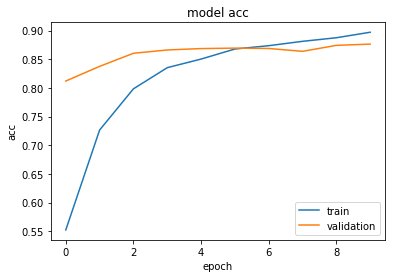

In [38]:
plot_train(history)

In [48]:
preds = model.predict(x_test[10:15])

In [49]:
preds

array([[ 0.8334921 ,  0.16650791],
       [ 0.13927421,  0.86072582],
       [ 0.2111524 ,  0.78884757],
       [ 0.12995026,  0.87004972],
       [ 0.07056675,  0.92943323]], dtype=float32)

In [50]:
y_test[10:15]

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [51]:
model.predict_on_batch(x_test[10:15])

array([[ 0.8334921 ,  0.16650791],
       [ 0.13927421,  0.86072582],
       [ 0.2111524 ,  0.78884757],
       [ 0.12995026,  0.87004972],
       [ 0.07056675,  0.92943323]], dtype=float32)